In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def load_data(file):
    dataset = pd.read_csv(file)
    return dataset


In [2]:
data = load_data('insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [34]:
smokers=data[data['smoker']=='yes']
smokers.describe()

,age,bmi,children,charges
count,274.000000,274.000000,274.000000,274.000000
mean,38.514599,30.708449,1.113139,32050.231832
std,13.923186,6.318644,1.157066,11541.547176
min,18.000000,17.195000,0.000000,12829.455100
25%,27.000000,26.083750,0.000000,20826.244213
50%,38.000000,30.447500,1.000000,34456.348450
75%,49.000000,35.200000,2.000000,41019.207275
max,64.000000,52.580000,5.000000,63770.428010


In [33]:
n_smokers=data[data['smoker']=='no']
n_smokers.describe()

,age,bmi,children,charges
count,1064.000000,1064.000000,1064.000000,1064.000000
mean,39.385338,30.651795,1.090226,8434.268298
std,14.083410,6.043111,1.218136,5993.781819
min,18.000000,15.960000,0.000000,1121.873900
25%,26.750000,26.315000,0.000000,3986.438700
50%,40.000000,30.352500,1.000000,7345.405300
75%,52.000000,34.430000,2.000000,11362.887050
max,64.000000,53.130000,5.000000,36910.608030


([<matplotlib.patches.Wedge at 0x9683a50>,
 [Text(0.880103,0.659863,'Smokers'), Text(-0.920107,-0.689857,'Non Smokers')])

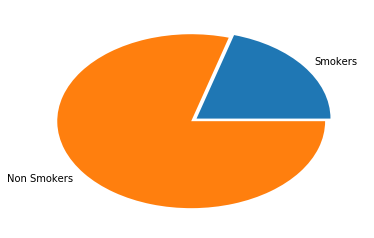

In [5]:
#plots
sizes=[smokers.shape[0], n_smokers.shape[0]]
labels=['Smokers', 'Non Smokers']
explode = (0, 0.05)
plt.pie(sizes,explode, labels)

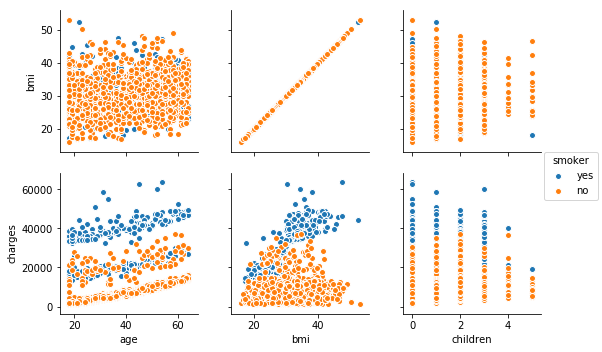

In [6]:
sns.pairplot(data, hue='smoker', x_vars=['age', 'bmi', 'children'], y_vars=['bmi','charges'])

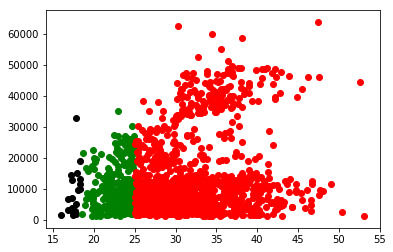

In [7]:
low = data.query('bmi<18.5')
good = data.query('bmi>18.5 & bmi<=25')
high = data.query('bmi>25')
plt.scatter(low['bmi'].tolist(), low['charges'].tolist(),color='black')
plt.scatter(good['bmi'].tolist(), good['charges'].tolist(),color='green')
plt.scatter(high['bmi'].tolist(), high['charges'].tolist(),color='red')
plt.show()

In [8]:
low.describe()

,age,bmi,children,charges
count,20.000000,20.000000,20.000000,20.000000
mean,32.350000,17.566250,1.050000,8852.200585
std,13.480102,0.608326,1.276302,7735.038364
min,18.000000,15.960000,0.000000,1621.340200
25%,21.000000,17.290000,0.000000,2751.631438
50%,27.500000,17.575000,1.000000,6759.262475
75%,38.250000,17.978750,2.000000,12923.162737
max,60.000000,18.335000,5.000000,32734.186300


In [9]:
good.describe()

,age,bmi,children,charges
count,226.000000,226.000000,226.000000,226.000000
mean,36.893805,22.655442,1.123894,10435.440719
std,13.669341,1.631081,1.237436,7484.434940
min,18.000000,18.600000,0.000000,1121.873900
25%,25.000000,21.561250,0.000000,4146.836312
50%,36.000000,22.990000,1.000000,8604.153525
75%,47.750000,24.035000,2.000000,15197.264325
max,64.000000,25.000000,5.000000,35069.374520


In [10]:
high.describe()

,age,bmi,children,charges
count,1091.000000,1091.000000,1091.000000,1091.000000
mean,39.817599,32.573483,1.089826,13946.476035
std,14.071792,4.982788,1.199081,12834.725537
min,18.000000,25.080000,0.000000,1131.506600
25%,27.000000,28.600000,0.000000,4889.518150
50%,40.000000,31.900000,1.000000,9563.029000
75%,52.000000,35.815000,2.000000,17654.442975
max,64.000000,53.130000,5.000000,63770.428010


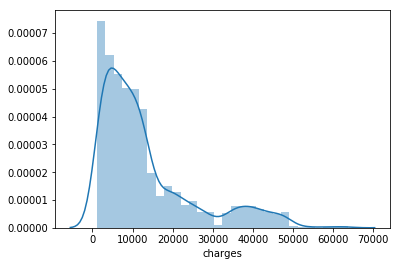

In [11]:
sns.distplot(data['charges'])

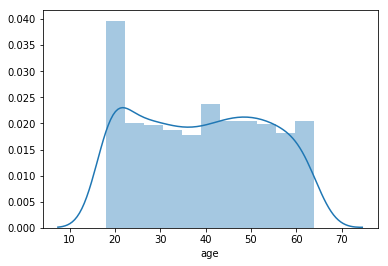

In [12]:
sns.distplot(data['age'])

0.2840471105987448

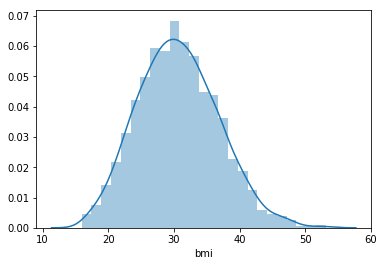

In [13]:
sns.distplot(data['bmi'])
data['bmi'].skew()

In [14]:
#skewness of data
data['charges'].skew()

1.5158796580240388

In [15]:
#skewness of smokers
smokers['charges'].skew()

0.12821727537875743

In [16]:
n_smokers['charges'].skew()

1.5381200362088077

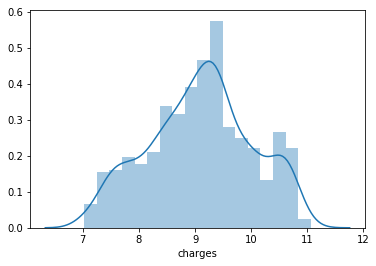

In [17]:
target = np.log(data['charges'])
sns.distplot(target)

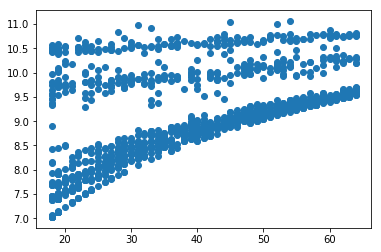

In [18]:
plt.scatter(data['age'].tolist(),target.tolist())

In [19]:
target.skew()

-0.09009752473024583

In [20]:
m_data = data.loc[:,['age','charges']]

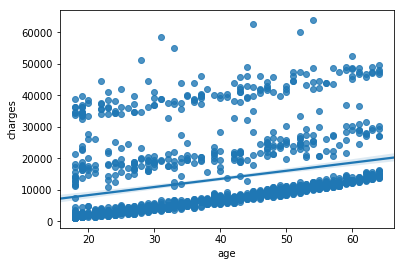

In [21]:
sns.regplot(x='age',y='charges', data=m_data)

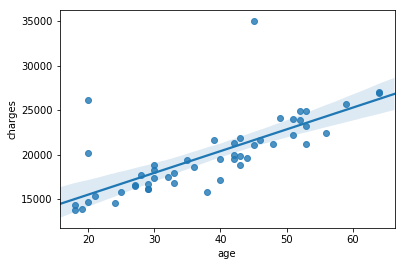

In [22]:
#regression for smokers with low bmi
smk_good = smokers.query('bmi>18.5 & bmi<25')
m_data = smk_good.loc[:,['age','charges']]
sns.regplot(x='age',y='charges', data=m_data)

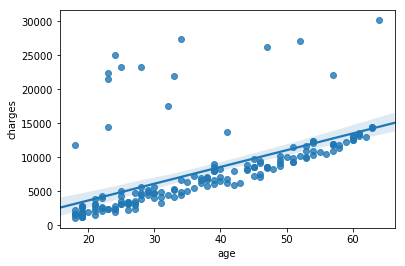

In [23]:
#regression for non-smokers with good bmi
smk_good = n_smokers.query('bmi>18.5 & bmi<25')
m_data = smk_good.loc[:,['age','charges']]
sns.regplot(x='age',y='charges', data=m_data)

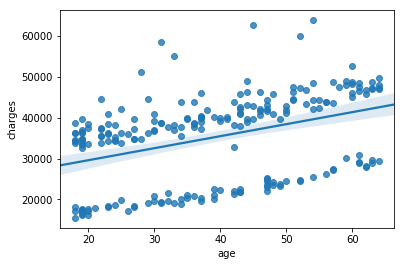

In [24]:
#regression for smokers with high bmi
smk_high = smokers.query('bmi>25')
m_data = smk_high.loc[:,['age','charges']]
sns.regplot(x='age',y='charges', data=m_data)

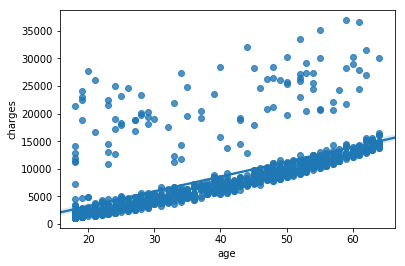

In [25]:
m_data = n_smokers.loc[:,['age','charges']]
sns.regplot(x='age',y='charges', data=m_data)

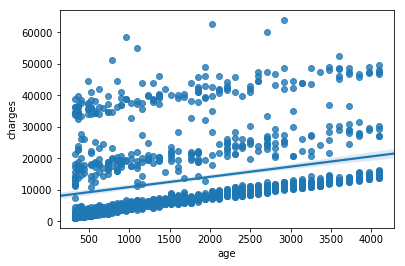

In [26]:
#regression for all data with age squared
m_data = data.loc[:,['age','charges']]
m_data['age']=m_data['age']**2
sns.regplot(x='age',y='charges', data=m_data)

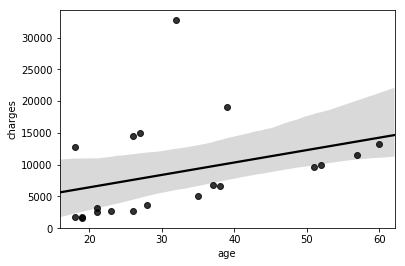

In [27]:
#age vs bmi realtion
m_data = data.loc[:,['age','bmi','charges']]
low = m_data.query('bmi<18.5')
good = m_data.query('bmi>18.5 & bmi<25')
high = m_data.query('bmi>25')
sns.regplot(x='age',y='charges', data=low, color='black')



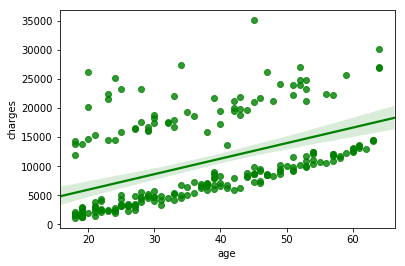

In [28]:
sns.regplot(x='age',y='charges', data=good, color='green')

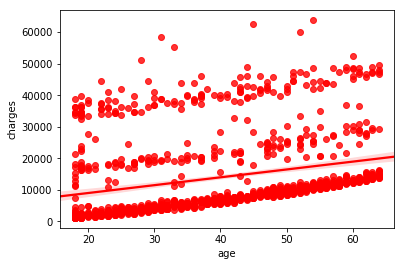

In [35]:
sns.regplot(x='age',y='charges', data=high, color='red')

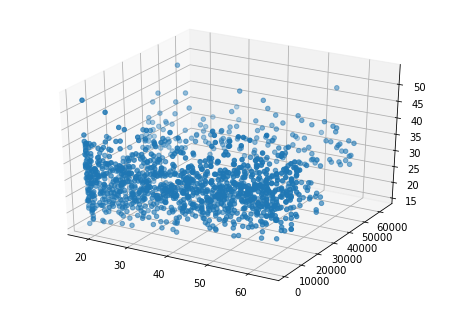

In [40]:
#plotting a 3d graph with age, bmi with insurance charges
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)

age=data['age']
bmi=data['bmi']
charges=data['charges']

ax.scatter(xs=age, ys=charges, zs=bmi, zdir='z')

In [12]:
agesort=data.sort_values('age')

In [27]:
reg=data.groupby(['region'])
data.groupby(['region']).plot(x='region', y='charges',kind='bar')

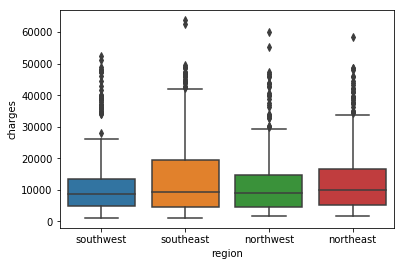

In [46]:
#for index, group in data.groupby(['region']):
    #group_agg = group.groupby(['region'])
    #group_agg.plot(y='charges', label=index)
sns.boxplot(x='region',y='charges',data=data)

In [29]:
data['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)